In [1]:
# Imports
import torch
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from multiprocessing import Pool
import sys
sys.path.append("../models/")
from CustomCNNVessel import CustomResNet


torch.cuda.empty_cache()
device = torch.device("cuda")
import torch.nn.functional as F


In [5]:
""" def process_pixel(args):
    gradient, threshold_proportion, i, j = args
    threshold = np.max(gradient) * threshold_proportion
    mask = np.abs(gradient[i,j]) > threshold
    num_pixels_above_threshold = np.sum(mask)
    if j == 5:
        exit
    return (i, j, num_pixels_above_threshold)

def create_fullfiment_images(gradient, threshold_proportion=0.01):
    gradient_np = gradient.detach().cpu().numpy()
    fulfillment_image = np.zeros_like(gradient_np[0, 0])

    # Create a list of arguments for each pixel
    args_list = [(gradient_np, threshold_proportion, i, j) for i in range(gradient_np.shape[0]) for j in range(gradient_np.shape[1])]

    # Use multiprocessing to process each pixel in parallel
    with Pool() as pool:
        results = pool.map(process_pixel, args_list)

    # Fill the fulfillment_image with the results
    for i, j, num_pixels_above_threshold in results:
        fulfillment_image[i, j] = num_pixels_above_threshold

    fulfillment_image = (fulfillment_image - fulfillment_image.min()) / (fulfillment_image.max() - fulfillment_image.min())
    return fulfillment_image

for idx in range(1):
  loaded_gradient = torch.load(f'./gradients/jacobian_gradient_{idx}.pt')
  print(loaded_gradient.shape)
  break
  img = create_fullfiment_images(loaded_gradient)
  np.save(f'./fulfillment_images/image_{idx}.npy', img)
  plt.imshow(img, cmap='RdYlGn')
  break """

" def process_pixel(args):\n    gradient, threshold_proportion, i, j = args\n    threshold = np.max(gradient) * threshold_proportion\n    mask = np.abs(gradient[i,j]) > threshold\n    num_pixels_above_threshold = np.sum(mask)\n    if j == 5:\n        exit\n    return (i, j, num_pixels_above_threshold)\n\ndef create_fullfiment_images(gradient, threshold_proportion=0.01):\n    gradient_np = gradient.detach().cpu().numpy()\n    fulfillment_image = np.zeros_like(gradient_np[0, 0])\n\n    # Create a list of arguments for each pixel\n    args_list = [(gradient_np, threshold_proportion, i, j) for i in range(gradient_np.shape[0]) for j in range(gradient_np.shape[1])]\n\n    # Use multiprocessing to process each pixel in parallel\n    with Pool() as pool:\n        results = pool.map(process_pixel, args_list)\n\n    # Fill the fulfillment_image with the results\n    for i, j, num_pixels_above_threshold in results:\n        fulfillment_image[i, j] = num_pixels_above_threshold\n\n    fulfillment_i

In [2]:
# AUGMENTED VESSELS FULFILLMENTE IMAGES
def process_pixel(args):
    gradient, threshold_proportion, i, j = args
    threshold = np.max(gradient) * threshold_proportion
    mask = np.abs(gradient[i,j]) > threshold
    num_pixels_above_threshold = np.sum(mask)
    if j == 5:
        exit
    return (i, j, num_pixels_above_threshold)

def create_fullfiment_images(gradient, threshold_proportion=0.01):
    gradient_np = gradient.detach().cpu().numpy()
    fulfillment_image = np.zeros_like(gradient_np[0, 0])

    # Create a list of arguments for each pixel
    args_list = [(gradient_np, threshold_proportion, i, j) for i in range(gradient_np.shape[0]) for j in range(gradient_np.shape[1])]

    # Use multiprocessing to process each pixel in parallel
    with Pool() as pool:
        results = pool.map(process_pixel, args_list)

    # Fill the fulfillment_image with the results
    for i, j, num_pixels_above_threshold in results:
        fulfillment_image[i, j] = num_pixels_above_threshold

    fulfillment_image = (fulfillment_image - fulfillment_image.min()) / (fulfillment_image.max() - fulfillment_image.min())
    return fulfillment_image

for idx in range(4):
  loaded_gradient = torch.load(f'/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/torchseg_gradients/augmented_vessels_trained_model/jacobian_gradient_{idx}.pt')
  img = create_fullfiment_images(loaded_gradient)
  np.save(f'/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/torchseg_gradients/augmented_vessels_trained_model/image_{idx}.npy', img)

In [ ]:
# Models
model = CustomResNet(num_classes=2).to(device)
# Load the weights
model.load_state_dict(torch.load(f"../models/vess_map_regularized_none_200.pth"))
model = model.eval()

def load_images_from_directory(directory_name):
    # Get the list of image file names in sorted order
    image_files = sorted(os.listdir(directory_name))

    # Load and store the images in a list
    images = []
    for file_name in image_files:
        if file_name.endswith('.png'):
            img_path = os.path.join(directory_name, file_name)
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)

    return images

# Load images from both directories
original_images = load_images_from_directory('./original_images')
original_images = torch.tensor(np.array(original_images) / 255.0, dtype=torch.float).to('cuda')

In [ ]:
original_images.shape

torch.Size([100, 224, 224])

In [ ]:
# Load the array from disk
idx = 0
fulfillment_image = np.load(f'./fulfillment_images/image_{idx}.npy')
original_image = original_images[idx]
model_mask = model(original_images[idx].unsqueeze(0).unsqueeze(0))
softmax_probs = F.softmax(model_mask, dim=1)
class_one_probs = softmax_probs[0, 1, :, :].detach().cpu().numpy()

In [3]:
# Models
model = CustomResNet(num_classes=2).to(device)
# Load the weights
model.load_state_dict(torch.load(f"../models/vess_map_regularized_none_200.pth"))
model = model.eval()

def load_images_from_directory(directory_name):
    # Get the list of image file names in sorted order
    image_files = sorted(os.listdir(directory_name))

    # Load and store the images in a list
    images = []
    for file_name in image_files:
        if file_name.endswith('.png'):
            img_path = os.path.join(directory_name, file_name)
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)

    return images

# Load images from both directories
original_images = load_images_from_directory('/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/original_images')
original_images = torch.tensor(np.array(original_images) / 255.0, dtype=torch.float).to('cuda')

In [7]:
# Assuming original_images is a list of tensors and model is your PyTorch model
for idx in range(1,11):
    if idx == 9:
        idx = '09'
    #fulfillment_image = np.load(f'./fulfillment_images/image_{idx}.npy')
    fulfillment_image = np.load(f'/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/fulfillment_images_2/image_{idx}.npy')
    #old_fulfillment_image = np.load(f'./fulfillment_images/old/image_{idx}.npy')
    
    original_image = original_images[idx].cpu().numpy()
    model_mask = model(original_images[idx].unsqueeze(0).unsqueeze(0))
    softmax_probs = F.softmax(model_mask, dim=1)
    class_one_probs = softmax_probs[0, 1, :, :].detach().cpu().numpy()

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(original_image.squeeze(), cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(class_one_probs, cmap='RdYlGn')
    axs[1].set_title('Softmax Probabilities')
    axs[1].axis('off')

    axs[2].imshow(fulfillment_image, cmap='RdYlGn')
    axs[2].set_title('Pixels above 1% max value\n of ALL gradients')
    axs[2].axis('off')
    
    """ axs[3].imshow(old_fulfillment_image, cmap='RdYlGn')
    axs[3].set_title('Pixels above 1% max value\n of RESPECTIVE gradient')
    axs[3].axis('off') """

    

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/fulfillment_images_2/image_1.npy'

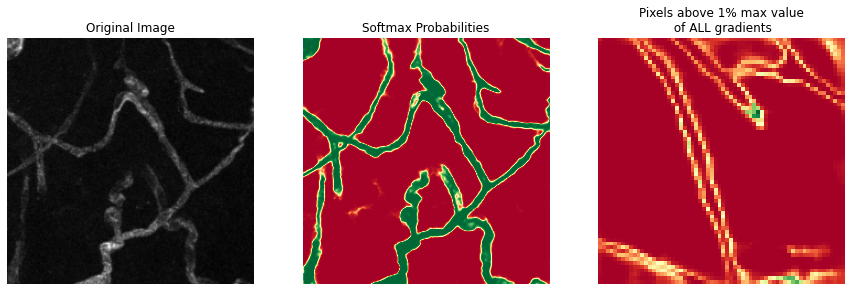

In [17]:
# Assuming original_images is a list of tensors and model is your PyTorch model
for idx in range(1):
    
    fulfillment_image = np.array(Image.open(f'/home/fonta42/Desktop/interpretacao-redes-neurais/experiments/fulfillment_images_2/image_{idx}.png'))
    original_image = original_images[idx].cpu().numpy()
    model_mask = model(original_images[idx].unsqueeze(0).unsqueeze(0))
    softmax_probs = F.softmax(model_mask, dim=1)
    class_one_probs = softmax_probs[0, 1, :, :].detach().cpu().numpy()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original_image.squeeze(), cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(class_one_probs, cmap='RdYlGn')
    axs[1].set_title('Softmax Probabilities')
    axs[1].axis('off')

    axs[2].imshow(fulfillment_image, cmap='RdYlGn')
    axs[2].set_title('Pixels above 1% max value\n of ALL gradients')
    axs[2].axis('off')
    
    """ axs[3].imshow(old_fulfillment_image, cmap='RdYlGn')
    axs[3].set_title('Pixels above 1% max value\n of RESPECTIVE gradient')
    axs[3].axis('off') """

    

    plt.show()